In [ ]:
project_name = "bird-classification-cnn"

In [ ]:
import os
from random import randrange
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.models as models
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_dir = '/content/drive/My Drive/Birds'
species = os.listdir(data_dir + "/train")
num_classes = len(species)
print("num species:", num_classes)
#lets display all species and their total numbers
print({cls: len(os.listdir(data_dir + f"/train/{cls}/")) for cls in sorted(species)})

num species: 200
{'AFRICAN FIREFINCH': 140, 'ALBATROSS': 97, 'ALEXANDRINE PARAKEET': 165, 'AMERICAN AVOCET': 179, 'AMERICAN BITTERN': 170, 'AMERICAN COOT': 158, 'AMERICAN GOLDFINCH': 133, 'AMERICAN KESTREL': 130, 'AMERICAN PIPIT': 179, 'AMERICAN REDSTART': 139, 'ANHINGA': 147, 'ANNAS HUMMINGBIRD': 139, 'ANTBIRD': 150, 'ARARIPE MANAKIN': 105, 'BALD EAGLE': 160, 'BALTIMORE ORIOLE': 137, 'BANANAQUIT': 106, 'BAR-TAILED GODWIT': 114, 'BARN OWL': 119, 'BARN SWALLOW': 132, 'BAY-BREASTED WARBLER': 143, 'BEARDED BARBET': 160, 'BELTED KINGFISHER': 125, 'BIRD OF PARADISE': 104, 'BLACK FRANCOLIN': 131, 'BLACK SKIMMER': 111, 'BLACK SWAN': 112, 'BLACK THROATED WARBLER': 135, 'BLACK VULTURE': 126, 'BLACK-CAPPED CHICKADEE': 133, 'BLACK-NECKED GREBE': 105, 'BLACK-THROATED SPARROW': 168, 'BLACKBURNIAM WARBLER': 134, 'BLUE GROUSE': 185, 'BLUE HERON': 104, 'BOBOLINK': 157, 'BROWN NOODY': 129, 'BROWN THRASHER': 99, 'CACTUS WREN': 122, 'CALIFORNIA CONDOR': 153, 'CALIFORNIA GULL': 109, 'CALIFORNIA QUAIL': 11

In [ ]:
file_info = {cls: len(os.listdir(data_dir + f"/train/{cls}/")) for cls in species}
file_info

{'AFRICAN FIREFINCH': 140,
 'ALBATROSS': 97,
 'ALEXANDRINE PARAKEET': 165,
 'AMERICAN AVOCET': 179,
 'AMERICAN BITTERN': 170,
 'AMERICAN COOT': 158,
 'AMERICAN GOLDFINCH': 133,
 'AMERICAN KESTREL': 130,
 'AMERICAN PIPIT': 179,
 'AMERICAN REDSTART': 139,
 'ANHINGA': 147,
 'ANNAS HUMMINGBIRD': 139,
 'ANTBIRD': 150,
 'ARARIPE MANAKIN': 105,
 'BALD EAGLE': 160,
 'BALTIMORE ORIOLE': 137,
 'BANANAQUIT': 106,
 'BAR-TAILED GODWIT': 114,
 'BARN OWL': 119,
 'BARN SWALLOW': 132,
 'BAY-BREASTED WARBLER': 143,
 'BEARDED BARBET': 160,
 'BELTED KINGFISHER': 125,
 'BIRD OF PARADISE': 104,
 'BLACK FRANCOLIN': 131,
 'BLACK SKIMMER': 111,
 'BLACK SWAN': 112,
 'BLACK THROATED WARBLER': 135,
 'BLACK VULTURE': 126,
 'BLACK-CAPPED CHICKADEE': 133,
 'BLACK-NECKED GREBE': 105,
 'BLACK-THROATED SPARROW': 168,
 'BLACKBURNIAM WARBLER': 134,
 'BLUE GROUSE': 185,
 'BLUE HERON': 104,
 'BOBOLINK': 157,
 'BROWN NOODY': 129,
 'BROWN THRASHER': 99,
 'CACTUS WREN': 122,
 'CALIFORNIA CONDOR': 153,
 'CALIFORNIA GULL': 109,

In [ ]:
transform = tt.Compose(
    [
        tt.ToTensor(), 
    ]
)

# Create datasets
train_ds = ImageFolder(data_dir+'/train', transform)
valid_ds = ImageFolder(data_dir+'/test', transform)

# or we can directly write 
# from torchvision.transforms import ToTensor
#train_ds = ImageFolder(data_dir + '/train', transfrom = ToTensor()) 
    
    
# set the batch size
batch_size = 64

#creating training and validation data loader
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=2, pin_memory=True)

classes = valid_ds.classes

In [ ]:
classes 

['AFRICAN FIREFINCH',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'ANHINGA',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ARARIPE MANAKIN',
 'BALD EAGLE',
 'BALTIMORE ORIOLE',
 'BANANAQUIT',
 'BAR-TAILED GODWIT',
 'BARN OWL',
 'BARN SWALLOW',
 'BAY-BREASTED WARBLER',
 'BEARDED BARBET',
 'BELTED KINGFISHER',
 'BIRD OF PARADISE',
 'BLACK FRANCOLIN',
 'BLACK SKIMMER',
 'BLACK SWAN',
 'BLACK THROATED WARBLER',
 'BLACK VULTURE',
 'BLACK-CAPPED CHICKADEE',
 'BLACK-NECKED GREBE',
 'BLACK-THROATED SPARROW',
 'BLACKBURNIAM WARBLER',
 'BLUE GROUSE',
 'BLUE HERON',
 'BOBOLINK',
 'BROWN NOODY',
 'BROWN THRASHER',
 'CACTUS WREN',
 'CALIFORNIA CONDOR',
 'CALIFORNIA GULL',
 'CALIFORNIA QUAIL',
 'CANARY',
 'CAPE MAY WARBLER',
 'CAPUCHINBIRD',
 'CARMINE BEE-EATER',
 'CASPIAN TERN',
 'CASSOWARY',
 'CHARA DE COLLAR',
 'CHIPPING SPARROW',
 'CINNAMON TEAL',
 'COCK OF THE  ROCK'

In [ ]:
blue_heron = os.listdir(data_dir + "/train/BLUE HERON")
print('No. of pic of blue heron:', len(blue_heron))
print(blue_heron[:5])

No. of pic of blue heron: 104
['013.jpg', '043.jpg', '018.jpg', '063.jpg', '060.jpg']


In [ ]:
eagle_test_files = os.listdir(data_dir + "/test/GOLDEN EAGLE")
print("No. of test examples for ship:", len(eagle_test_files))
print(eagle_test_files[:5])

No. of test examples for ship: 5
['3.jpg', '1.jpg', '5.jpg', '4.jpg', '2.jpg']


In [ ]:
import matplotlib.pyplot as plt

def show_example1(img, label):
    print('Label: ', train_ds.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  AFRICAN FIREFINCH (0)


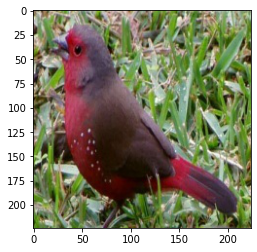

In [ ]:
show_example1(*train_ds[0])

Label:  BROWN NOODY (36)


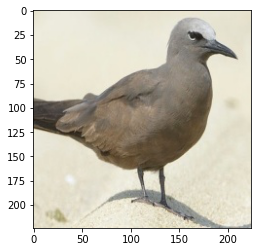

In [ ]:
show_example1(*train_ds[5000])

Label:  ALEXANDRINE PARAKEET (2)


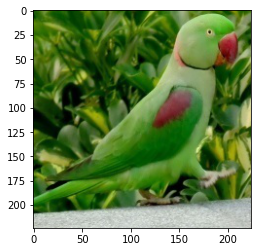

In [ ]:
show_example1(*train_ds[259])

In [ ]:
def show_example(data):
    [img, label] = data
    print(classes[label])
    plt.imshow(img.permute(1, 2, 0))

BLACKBURNIAM WARBLER


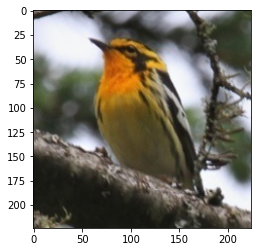

In [ ]:
# show a bird - hi bird!
image_number = randrange(20000)
show_example(train_ds[image_number])

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(20, 20))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=16).permute(1, 2, 0))
        break

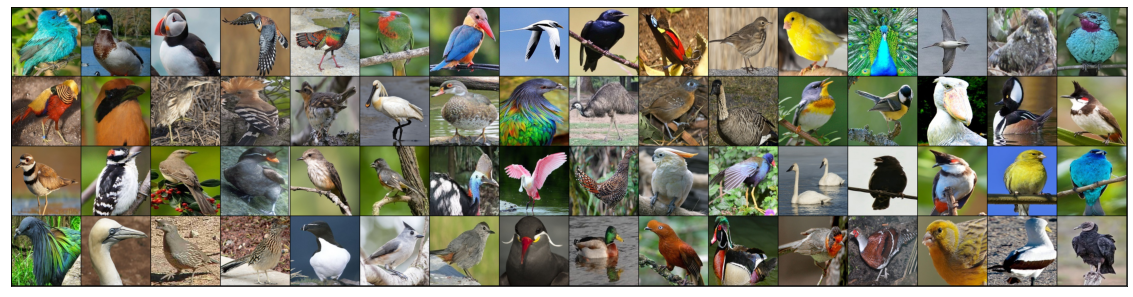

In [ ]:
show_batch(train_dl)

In [ ]:
jovian.commit(project = project_name)

[jovian] Error: Failed to detect Jupyter notebook or Python script. Skipping..


In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
    

device = get_default_device()
device

device(type='cuda')

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
class BirdResnet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, num_classes)
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.network.parameters():
            param.require_grad = False
        for param in self.network.fc.parameters():
            param.require_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.network.parameters():
            param.require_grad = True

In [ ]:
model = to_device(BirdResnet(), device)
model

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


BirdResnet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

In [ ]:
torch.cuda.empty_cache()
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
to_device(model, device);

for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([64, 3, 224, 224])
out.shape: torch.Size([64, 200])
out[0]: tensor([0.4762, 0.4812, 0.4647, 0.4914, 0.5452, 0.4553, 0.3054, 0.5329, 0.4565,
        0.4108, 0.4917, 0.3996, 0.4693, 0.4492, 0.3452, 0.5994, 0.4689, 0.4325,
        0.5123, 0.5663, 0.4993, 0.5150, 0.5098, 0.4272, 0.4724, 0.5721, 0.4117,
        0.5580, 0.5282, 0.3994, 0.5480, 0.5446, 0.6084, 0.4787, 0.4633, 0.5434,
        0.6981, 0.5351, 0.5789, 0.6021, 0.5357, 0.4675, 0.4743, 0.6537, 0.4308,
        0.4399, 0.3477, 0.4133, 0.4804, 0.5872, 0.6218, 0.3895, 0.5249, 0.5571,
        0.5000, 0.4659, 0.5625, 0.5572, 0.4322, 0.5158, 0.3783, 0.4462, 0.4794,
        0.6427, 0.5496, 0.4860, 0.5249, 0.5708, 0.5315, 0.4628, 0.4896, 0.6512,
        0.3946, 0.4295, 0.5106, 0.4704, 0.6068, 0.3704, 0.5324, 0.5593, 0.3352,
        0.6058, 0.5422, 0.7130, 0.4292, 0.6267, 0.3937, 0.4760, 0.4314, 0.4464,
        0.5189, 0.5566, 0.4023, 0.6804, 0.5795, 0.2496, 0.4333, 0.4806, 0.2830,
        0.4102, 0.4623, 0.4902, 0.5

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.00390625, 'val_loss': 5.307053565979004}]

In [ ]:
# freeze the model to only train the last layer
model.freeze()

In [ ]:
num_epochs = 15
opt_func = torch.optim.Adam
lr = 3e-4

In [ ]:
history = fit(num_epochs, lr, model, train_dl, valid_dl, opt_func)

Epoch [0], train_loss: 4.5172, val_loss: 4.3753, val_acc: 0.7573
Epoch [1], train_loss: 4.3699, val_loss: 4.3496, val_acc: 0.8284
Epoch [2], train_loss: 4.3531, val_loss: 4.3469, val_acc: 0.8526
Epoch [3], train_loss: 4.3441, val_loss: 4.3364, val_acc: 0.8384
Epoch [4], train_loss: 4.3395, val_loss: 4.3389, val_acc: 0.8592
Epoch [5], train_loss: 4.3386, val_loss: 4.3363, val_acc: 0.8434
Epoch [6], train_loss: 4.3355, val_loss: 4.3368, val_acc: 0.8134
Epoch [7], train_loss: 4.3326, val_loss: 4.3280, val_acc: 0.8535
Epoch [8], train_loss: 4.3301, val_loss: 4.3307, val_acc: 0.8715
Epoch [9], train_loss: 4.3308, val_loss: 4.3311, val_acc: 0.8459
Epoch [10], train_loss: 4.3312, val_loss: 4.3311, val_acc: 0.8528
Epoch [11], train_loss: 4.3292, val_loss: 4.3259, val_acc: 0.8692
Epoch [12], train_loss: 4.3272, val_loss: 4.3293, val_acc: 0.8550
Epoch [13], train_loss: 4.3260, val_loss: 4.3236, val_acc: 0.8728
Epoch [14], train_loss: 4.3253, val_loss: 4.3295, val_acc: 0.8347


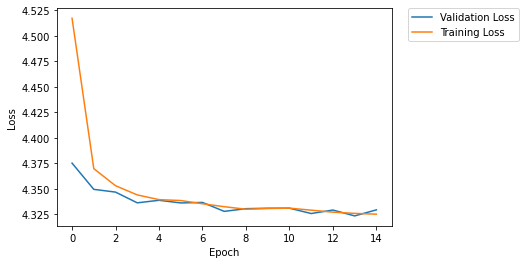

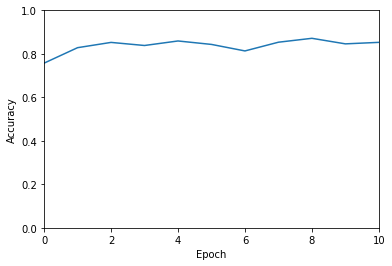

In [ ]:
val_loss = [hist['val_loss'] for hist in history]
train_loss = [hist['train_loss'] for hist in history]
val_acc = [hist['val_acc'] for hist in history]
plt.plot(val_loss, label="Validation Loss")
plt.plot(train_loss, label="Training Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

plt.plot()
plt.plot(val_acc)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 10, 0, 1])
plt.show()

In [ ]:
test_dataset = ImageFolder(data_dir+'/test', tt.ToTensor())
print(len(test_dataset))

1000


In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return test_dataset.classes[preds[0].item()]

Label: ALEXANDRINE PARAKEET , Predicted: ALEXANDRINE PARAKEET


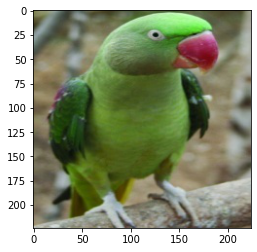

In [ ]:
img, label = test_dataset[10]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: COCK OF THE  ROCK , Predicted: COCK OF THE  ROCK


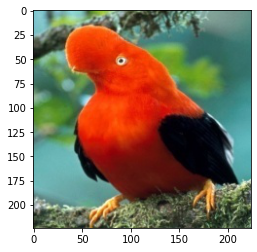

In [ ]:
img, label = test_dataset[255]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
def get_random_test_image(dataset):
    rand_num = randrange(len(dataset))
    return dataset[rand_num]

Label: D-ARNAUDS BARBET , Predicted: D-ARNAUDS BARBET


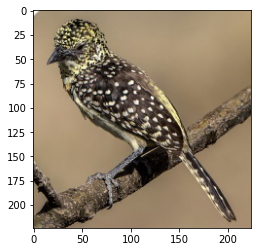

In [ ]:
img, label = get_random_test_image(dataset=test_dataset)
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8347355723381042, 'val_loss': 4.329503059387207}

In [ ]:
torch.save(model.state_dict(), 'birds-classification-cnn.pth')

In [ ]:
model2 = to_device(BirdResnet(), device)

In [ ]:
model2.load_state_dict(torch.load('birds-classification-cnn.pth'))

<All keys matched successfully>

In [ ]:
evaluate(model2, test_loader)

{'val_acc': 0.8347355723381042, 'val_loss': 4.329503059387207}

In [ ]:
torch.save(model)

TypeError: ignored

In [ ]:
torch.save(model2, 'birds-classification-cnn.pth' )

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type BirdResnet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
